In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikitavorona","key":"3ab71f514b6616a1a7e396075e5950fe"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset

Dataset URL: https://www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset
License(s): CC-BY-SA-4.0
 99% 1.47G/1.48G [00:10<00:00, 136MB/s]
100% 1.48G/1.48G [00:10<00:00, 148MB/s]


In [4]:
!unzip -q the-oxfordiiit-pet-dataset.zip -d ./data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Параметры
img_height, img_width = 64, 64
batch_size = 32

# Загрузка данных
data_gen = ImageDataGenerator(rescale=1.0/255.0)

train_data = data_gen.flow_from_directory(
    './data/images',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,
    shuffle=True
)

# Получение изображений
images = []
for i in range(len(train_data)):
    batch = next(train_data)
    images.append(batch)
images = np.vstack(images)


Found 7389 images belonging to 1 classes.


In [6]:
from tensorflow.keras import layers, models

# Определение автоэнкодера
input_img = layers.Input(shape=(img_height, img_width, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
# Обучение автоэнкодера
autoencoder.fit(images, images, epochs=10, batch_size=batch_size, validation_split=0.1)


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 80s 375ms/step - loss: 0.6098 - val_loss: 0.5465
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 76s 365ms/step - loss: 0.5488 - val_loss: 0.5414
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 77s 369ms/step - loss: 0.5443 - val_loss: 0.5393
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 82s 395ms/step - loss: 0.5411 - val_loss: 0.5382
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 138s 378ms/step - loss: 0.5410 - val_loss: 0.5385
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 76s 366ms/step - loss: 0.5398 - val_loss: 0.5367
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 85s 382ms/step - loss: 0.5396 - val_loss: 0.5361
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 78s 373ms/step - loss: 0.5384 - val_loss: 0.5358
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 81s 367ms/step - loss: 0.5391 - val_loss: 0.5362
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 85s 384ms/step - loss: 0.5396 - val_loss: 0.5355


231/231 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step


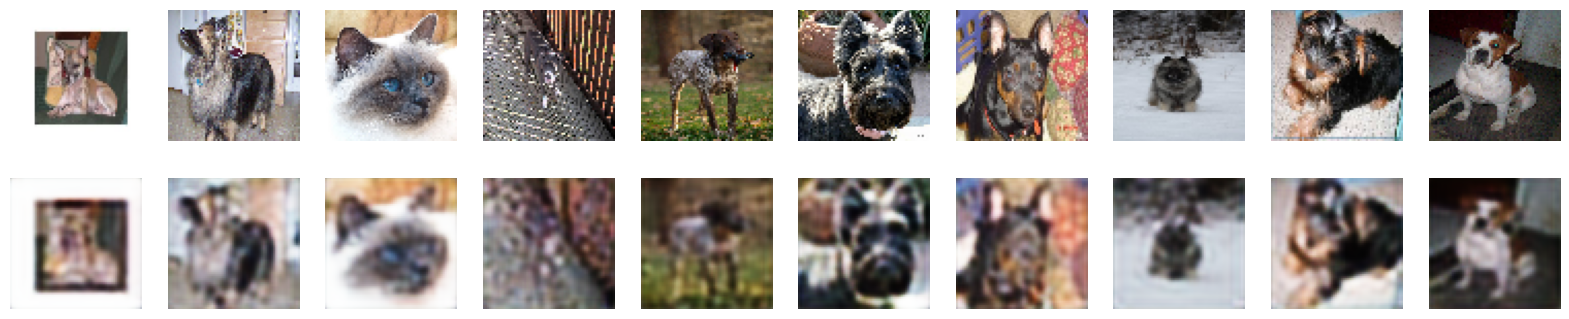

In [8]:
# Генерация изображений
encoded_imgs = autoencoder.predict(images)

# Визуализация оригинальных и восстановленных изображений
n = 10  # количество изображений для отображения
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригинальное изображение
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

    # Восстановленное изображение
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(encoded_imgs[i])
    plt.axis('off')
plt.show()
